In [76]:
from codecarbon import EmissionsTracker
from codecarbon import track_emissions
# Load the ROUGE metric
import evaluate
from evaluate import load

import pandas as pd

In [77]:
!ollama list

NAME             ID              SIZE      MODIFIED   
llama3:8b        365c0bd3c000    4.7 GB    2 days ago    
llama3:latest    365c0bd3c000    4.7 GB    2 days ago    


In [78]:
# read files(src)
# 1 筆一行，||||| 分 document

f = open("./Data/test.src.txt","r")
test_data = f.readlines()
f.close()

print(f"test: {len(test_data)}")

test: 5622


In [79]:
f = open("./Data/test.txt","r")
test_result = f.readlines()
f.close()

print(test_result[0])
print(len(test_result))

– It's a race for the governor's mansion in 11 states today, and the GOP could end the night at the helm of more than two-thirds of the 50 states. The GOP currently controls 29 of the country's top state offices; it's expected to keep the three Republican ones that are up for grabs (Utah, North Dakota, and Indiana), and wrest North Carolina from the Dems. That brings its toll to 30, with the potential to take three more, reports NPR. Races in Montana, New Hampshire, and Washington are still too close to call, and in all three, Democrat incumbents aren't seeking reelection. The results could have a big impact on health care, since a Supreme Court ruling grants states the ability to opt out of ObamaCare's Medicaid expansion. "A Romney victory would dramatically empower Republican governors," said one analyst. Click for NPR's state-by-state breakdown of what could happen.

5622


In [80]:
import requests
url = "http://localhost:11434/api/chat"
headers = {"Content-Type": "application/json"}

In [88]:
import requests

def chat_with_ollama(document, model="llama3:8b"):
    url = "http://localhost:11434/api/chat"
    headers = {"Content-Type": "application/json"}
    data = {
        "model": model,
        "messages":[{"role": "system", "content": "Summarize the text into a concise but complete summary. Include the main points and key details. utput only the summary text — do not include any labels, introductions, or explanations."},""],
        "stream": False  # 設為 True 可以接收串流回傳
    }

    articles = document.split("|||||")
    data["messages"][1] = {"role": "user", "content": articles[0]}
    response = requests.post(url, headers=headers, json=data)
    result = response.json()
    summary = result['message']['content']
    print(summary)
    
    data["messages"][0] = {"role": "system", "content": f"""You are an expert in multi-document summarization. 
You have a summary based on one article. The user will provide an related article. 

If the article content user provide contains any new perspectives or additional information, please integrate those into the summary by modifying only the necessary parts.

[ORIGINAL SUMMARY]
{summary}

Output only the new summary itself — do not include any labels, introductions, or explanations."""}
    
    for content in articles[1:]:
        data["messages"][1] = {"role": "user", "content": content}
        response = requests.post(url, headers=headers, json=data)
        result = response.json()
        summary = result['message']['content']
    
    return summary

print(test_result[0])
print(chat_with_ollama(test_data[0]))

– It's a race for the governor's mansion in 11 states today, and the GOP could end the night at the helm of more than two-thirds of the 50 states. The GOP currently controls 29 of the country's top state offices; it's expected to keep the three Republican ones that are up for grabs (Utah, North Dakota, and Indiana), and wrest North Carolina from the Dems. That brings its toll to 30, with the potential to take three more, reports NPR. Races in Montana, New Hampshire, and Washington are still too close to call, and in all three, Democrat incumbents aren't seeking reelection. The results could have a big impact on health care, since a Supreme Court ruling grants states the ability to opt out of ObamaCare's Medicaid expansion. "A Romney victory would dramatically empower Republican governors," said one analyst. Click for NPR's state-by-state breakdown of what could happen.

Voters in 11 states will elect their governors tonight, with Republicans expected to increase their numbers by at lea

In [89]:
candidates = []
data_num = 10

@track_emissions()
def summarize():
    for document in test_data[:data_num]:
        candidates.append(chat_with_ollama(document))
        
summarize()

[codecarbon WARNING @ 18:18:57] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 18:18:57] Error while trying to count physical CPUs: [Errno 2] No such file or directory: 'lscpu'. Defaulting to 1.
[codecarbon INFO @ 18:18:57] [setup] RAM Tracking...
[codecarbon INFO @ 18:18:57] [setup] CPU Tracking...
[codecarbon WARNING @ 18:18:57] We saw that you have a Apple M2 Max but we don't know it. Please contact us.
[codecarbon WARNING @ 18:18:58] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 18:18:58] CPU Model on constant consumption mode: Apple M2 Max
[codecarbon WARNING @ 18:18:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:18:58] [setup] GPU Tracking...
[codecarbon INFO @ 18:18:58] No GPU found.
[codecarbon INFO @ 18:18:58] The below tracking methods have been set up:
    

Voters in 11 states will elect governors, with Republicans expected to gain at least one seat and potentially hold more than two-thirds of the nation's top state offices. Eight Democratic-held seats are up for grabs, while three Republican-held seats are also contested. Only three races are considered competitive: Montana, New Hampshire, and Washington. Republicans are likely to win in North Carolina, Utah, North Dakota, and Indiana, while Democrats will hold onto their seats in West Virginia and Missouri. Additionally, Independents Lincoln Chafee of Rhode Island and Peter Shumlin of Vermont are expected to retain their governorships.
Here is the summary:

The "Hey Facebook what's SO wrong with a pic of two men kissing?" story has been misreported in mainstream media. The photo used was from British soap opera "Eastenders" and featured mild, non-graphic content. The John Snow Kiss-In event on Facebook was not removed by Facebook but made private by the organizer after the event. Richar

[codecarbon INFO @ 18:19:31] Energy consumed for RAM : 0.000050 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 18:19:31] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 18:19:31] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 18:19:31] 0.000404 kWh of electricity used since the beginning.


The crawl started from a list of every host in the Wayback Machine and was run at level 1, capturing URLs and their embeds, as well as outbound links and their embeds. The associated WARC files are not publicly available.


[codecarbon INFO @ 18:19:46] Energy consumed for RAM : 0.000075 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 18:19:46] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 18:19:46] Energy consumed for All CPU : 0.000532 kWh
[codecarbon INFO @ 18:19:46] 0.000607 kWh of electricity used since the beginning.


Here is a concise summary of the text:

The US Supreme Court is set to consider cases that could impact labor unions, affirmative action, and religious nonprofits. The court may gut public sector labor unions and roll back affirmative action at state universities. Litigation over state efforts to limit abortion and religious institutions' rights to opt out of providing contraception under Obamacare are also expected to land on the docket. Other potentially significant cases include a Texas dispute about whether states can compel government employees to pay union dues, a challenge to University of Texas at Austin's affirmative action program, and a case testing when abortion clinic regulations go too far.
A preservationist discovered a cellar in a Manhattan building that could be the foundation of the Revolutionary War-era Bull's Head Tavern, where George Washington is believed to have visited. If confirmed, it would mean the building, slated for demolition to make way for a hotel, is M

[codecarbon INFO @ 18:20:16] Energy consumed for RAM : 0.000125 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 18:20:16] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 18:20:16] Energy consumed for All CPU : 0.000886 kWh
[codecarbon INFO @ 18:20:16] 0.001011 kWh of electricity used since the beginning.


An Israeli warplane shot down an unmanned aircraft that crossed into southern Israel from the Mediterranean near Gaza, but it remained unclear where the aircraft came from. An Iranian military official said the incident exposed the weakness of Israel's air defenses and claimed its anti-missile defense system "does not work" due to a lack of capacity. The Israeli military released video footage of the mid-air interception, showing a small aircraft being destroyed by a missile. The incident has sparked tensions between Israel and Iran, with threats of retaliation and counter-attacks.
The Pompidou Centre in Paris hopes to display Picasso's "The Hairdresser" painting, worth millions, in May after it was recovered by US customs authorities. The 1911 cubist painting was reported missing from a storeroom in 2001 and smuggled into the US from Belgium. It is expected to be exhibited publicly again in May.


[codecarbon INFO @ 18:20:31] Energy consumed for RAM : 0.000150 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 18:20:31] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 18:20:31] Energy consumed for All CPU : 0.001063 kWh
[codecarbon INFO @ 18:20:31] 0.001213 kWh of electricity used since the beginning.


Alexa Internet donated its crawl data to the Internet Archive starting in 1996, adding it to the Wayback Machine after a delay, with new data flowing in daily.
Crystal Almeida, 26, and Scott Painter are still in critical condition but making remarkable recoveries after being wounded. Suspect Armando Luis Juarez, 29, was arrested Tuesday night after a police chase and initially charged with aggravated assault against a public servant and civilian. A capital murder charge was added after Santander's death.


[codecarbon INFO @ 18:20:45] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 18:20:45] Energy consumed for RAM : 0.000173 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 18:20:45] Delta energy consumed for CPU with constant : 0.000161 kWh, power : 42.5 W
[codecarbon INFO @ 18:20:45] Energy consumed for All CPU : 0.001224 kWh
[codecarbon INFO @ 18:20:45] 0.001397 kWh of electricity used since the beginning.
/Users/lala/miniconda3/lib/python3.12/site-packages/codecarbon/output_methods/file.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df])
[codecarbon INFO @ 18:20:45] Done!



In [90]:
references = [i.strip("– ") for i in test_result[:data_num]]
print(references[0])

It's a race for the governor's mansion in 11 states today, and the GOP could end the night at the helm of more than two-thirds of the 50 states. The GOP currently controls 29 of the country's top state offices; it's expected to keep the three Republican ones that are up for grabs (Utah, North Dakota, and Indiana), and wrest North Carolina from the Dems. That brings its toll to 30, with the potential to take three more, reports NPR. Races in Montana, New Hampshire, and Washington are still too close to call, and in all three, Democrat incumbents aren't seeking reelection. The results could have a big impact on health care, since a Supreme Court ruling grants states the ability to opt out of ObamaCare's Medicaid expansion. "A Romney victory would dramatically empower Republican governors," said one analyst. Click for NPR's state-by-state breakdown of what could happen.



In [91]:
# rouge
rouge = evaluate.load('rouge')
results_R = rouge.compute(predictions=candidates, references=references) #結果平均

print("ROUGE:")
print(f"rouge1: {results_R['rouge1']}\nrouge2: {results_R['rouge2']}\nrougeL: {results_R['rougeL']}\nrougeLsum: {results_R["rougeLsum"]}")

ROUGE:
rouge1: 0.28677156722528296
rouge2: 0.0934506058356657
rougeL: 0.14767963660801214
rougeLsum: 0.15345102116397824


In [92]:
# bleu
# 不需要 brevity_prnalty，可能要考慮手動算 bleu(無BP)
bleu = evaluate.load('bleu')
results_B = bleu.compute(predictions=candidates, references=references)
print("BLEU:")
print(f"bleu: {results_B['bleu']}\nprecisions: {results_B['precisions']}\nbrevity_penalty: {results_B['brevity_penalty']}\nlength_ratio: {results_B["length_ratio"]}\ntranslation_length: {results_B["translation_length"]}\nreference_length: {results_B["reference_length"]}")

BLEU:
bleu: 0.024146215753387622
precisions: [0.545045045045045, 0.1845102505694761, 0.07834101382488479, 0.038461538461538464]
brevity_penalty: 0.18301298027380744
length_ratio: 0.37061769616026713
translation_length: 888
reference_length: 2396


In [93]:
'''results_R = {}
results_R['rouge1'] = 0.3042215287471872
results_R['rouge2'] = 0.08818775179799443
results_R['rougeL'] =  0.1639229255348068
results_R['rougeLsum'] = 0.16663142006267556

results_B = {}
results_B['bleu'] = 0.02515597115661552

print(results_R)'''

"results_R = {}\nresults_R['rouge1'] = 0.3042215287471872\nresults_R['rouge2'] = 0.08818775179799443\nresults_R['rougeL'] =  0.1639229255348068\nresults_R['rougeLsum'] = 0.16663142006267556\n\nresults_B = {}\nresults_B['bleu'] = 0.02515597115661552\n\nprint(results_R)"

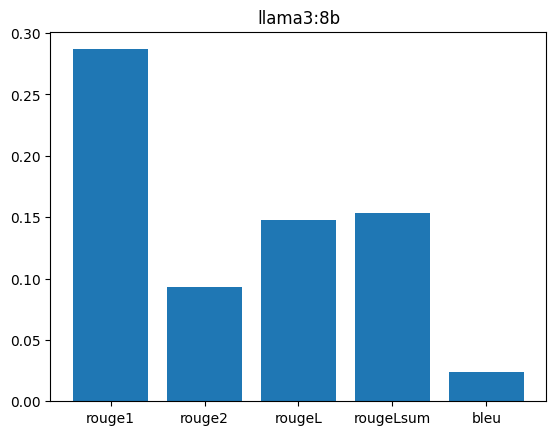

In [94]:
import matplotlib.pyplot as plt

x = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bleu']
y = [results_R[r] for r in x[:4]] + [results_B['bleu']]
plt.bar(x,y)
plt.title("llama3:8b")
plt.show()

# codecarbon show
carbonboard --filepath="emissions.csv"
http://127.0.0.1:8050/